In [1]:
#ResNet50–UNet (SAR-only 2ch, mr=0.02, weighted_sampling, no-pretrain, Tversky, AdamW + poly)
import os
import sys

REPO_PATH = "/home/hangkai/Chenchen/AIc_course_project/mmflood_repo_backup"
DATA_PATH = "/mnt/cephfs-mount/chenchen/mmflood_processed_v2"
OUTPUT_PATH = os.path.join(REPO_PATH, "output_experiments") 

if os.getcwd() != REPO_PATH:
    os.chdir(REPO_PATH)
    print(f"in: {os.getcwd()}")
else:
    print("right")

os.makedirs(OUTPUT_PATH, exist_ok=True)

in: /home/hangkai/Chenchen/AIc_course_project/mmflood_repo_backup


In [2]:
!CUDA_VISIBLE_DEVICES=3 python run.py train \
  --name "ResNet101_DeepLabv3p_3ch_SAR+DEM_mr002_ws_BCE_adamw_poly" \
  --data.path /mnt/cephfs-mount/chenchen/mmflood_processed_v2 \
  --output-folder /mnt/cephfs-mount/chenchen/mmflood_outputs_r101_dlv3p_3ch \
  \
  --data.in-channels 3 \
  --data.include-dem \
  --data.mask-body-ratio 0.02 \
  \
  --trainer.batch-size 12 \
  --trainer.max-epochs 100 \
  --trainer.patience 30 \
  \
  --model.encoder resnet101 \
  --model.decoder deeplabv3p \
  --model.no-pretrained \
  \
  --loss.target bce \
  \
  --optimizer.target adamw \
  --optimizer.lr 1e-3 \
  --optimizer.weight-decay 1e-2 \
  \
  --scheduler.target poly


/home/hangkai/miniconda3/envs/py310/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/home/hangkai/miniconda3/envs/py310/lib/python3.10/site-packages/timm/models/features.py:4: FutureWarning: Importing from timm.models.features is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
[2025-12-03 07:18] floods.training         : INFO     - Run started
[2025-12-03 07:18] floods.training         : INFO     - Experiment ID: ResNet101_DeepLabv3p_3ch_SAR+DEM_mr002_ws_BCE_adamw_poly
[2025-12-03 07:18] floods.training         : INFO     - Output folder: /mnt/cephfs-mount/chenchen/mmflood_outputs_r101_dlv3p_3ch/ResNet101_DeepLabv3p_3ch_SAR+DEM_mr002_

CWD: /home/hangkai/Chenchen/AIc_course_project/mmflood_repo_backup


[2025-12-03 16:28] floods.testing          : INFO     - seed                : 1337
[2025-12-03 16:28] floods.testing          : INFO     - image_size          : 512
[2025-12-03 16:28] floods.testing          : INFO     - trainer             : {'cpu': False, 'amp': True, 'batch_size': 12, 'num_workers': 4, 'max_epochs': 100, 'train_metrics': [<Metrics.iou: Initializer(<class 'floods.metrics.IoU'>, ignore_index=255)>], 'val_metrics': [<Metrics.f1: Initializer(<class 'floods.metrics.F1Score'>, ignore_index=255)>, <Metrics.iou: Initializer(<class 'floods.metrics.IoU'>, ignore_index=255)>, <Metrics.precision: Initializer(<class 'floods.metrics.Precision'>, ignore_index=255, reduction='macro')>, <Metrics.recall: Initializer(<class 'floods.metrics.Recall'>, ignore_index=255, reduction='macro')>], 'monitor': <Metrics.iou: Initializer(<class 'floods.metrics.IoU'>, ignore_index=255)>, 'patience': 30, 'validate_every': 1, 'temperature': 2.0, 'temp_epochs': 20}
[2025-12-03 16:28] floods.testing   

Epoch 0   - test:   0%| | 0/386 [00:00<?, ?batch/s, lo

/home/hangkai/miniconda3/envs/mmflood_py38/lib/python3.8/site-packages/accelerate/accelerator.py:304: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  model.forward = torch.cuda.amp.autocast()(model.forward)


Epoch 0   - test: 100%|█| 386/386 [00:57<00:00,  6.71b


[2025-12-03 16:29] floods.trainer.base     : INFO     - test/f1: 0.7928, test/iou: 0.6568, test/precision: 0.7516, test/recall: 0.8388, test/fg_iou: 0.6568, test/fg_f1: 0.7928, test/bg_iou: 0.9412, test/bg_f1: 0.9697
[2025-12-03 16:29] floods.trainer.callbacks: WARNING  - No content to be displayed
[2025-12-03 16:29] floods.testing          : INFO     - Testing completed, average loss: 0.1360
[2025-12-03 16:29] floods.testing          : INFO     - Average results:
[2025-12-03 16:29] floods.testing          : INFO     - f1                  : 0.7928
[2025-12-03 16:29] floods.testing          : INFO     - iou                 : 0.6568
[2025-12-03 16:29] floods.testing          : INFO     - precision           : 0.7516
[2025-12-03 16:29] floods.testing          : INFO     - recall              : 0.8388
[2025-12-03 16:29] floods.testing          : INFO     - fg_iou              : 0.6568
[2025-12-03 16:29] floods.testing          : INFO     - fg_f1               : 0.7928
[2025-12-03 16:29] fl

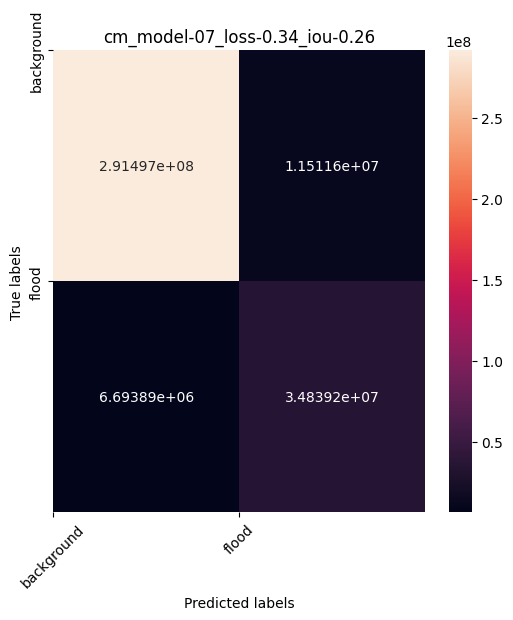

In [6]:
import os
import sys

os.environ["CUDA_VISIBLE_DEVICES"] = "3"  
REPO_PATH = "/home/hangkai/Chenchen/AIc_course_project/mmflood_repo_backup"
os.chdir(REPO_PATH)
sys.path.append(REPO_PATH)

print("CWD:", os.getcwd())

from floods.utils.common import prepare_logging
prepare_logging()

# TestConfig
from floods.config.testing import TestConfig

config = TestConfig(
    name="ResNet101_DeepLabv3p_3ch_SAR+DEM_mr002_ws_BCE_adamw_poly",
    data={
        "path": "/mnt/cephfs-mount/chenchen/mmflood_processed_v2",
        "in_channels": 3,
        "include_dem": True,
    },
    output_folder="/mnt/cephfs-mount/chenchen/mmflood_outputs_r101_dlv3p_3ch",
    visualize=True,
    num_samples=8,
)

from floods.testing import test
test(config)
